# Final Project
## Machine Learning: Prediction on bike sharing demand

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

# data set
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
import tensorflow as tf
from tensorflow.keras import layers

### Importing the merged dataset

In [2]:
#dataset = pd.read_csv('Joint_dataframe.csv')

dataset = pd.read_csv(
    'Joint_dataframe.csv',
    parse_dates=['timestamp'],
    index_col="timestamp"
)

# exclude timestamp column
#dataset = dataset.loc[:, dataset.columns!='timestamp']

In [3]:
dataset = dataset.drop(["index"], axis = 1)
dataset.head()

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,17,22,1,-5.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,42,31,2,11.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,51,39,3,12.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,44,37,4,7.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,48,38,5,10.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.156876,51.4931,-0.156876,51.4931


KeyboardInterrupt: 

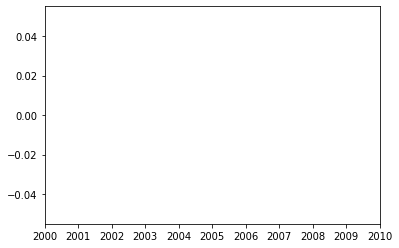

In [4]:
# Finding Outliers 

ax = sns.lineplot(x = "timestamp", y = "Total", data = dataset)
ax.set(xlabel = 'timestamp', ylabel = 'Count')

KeyboardInterrupt: 

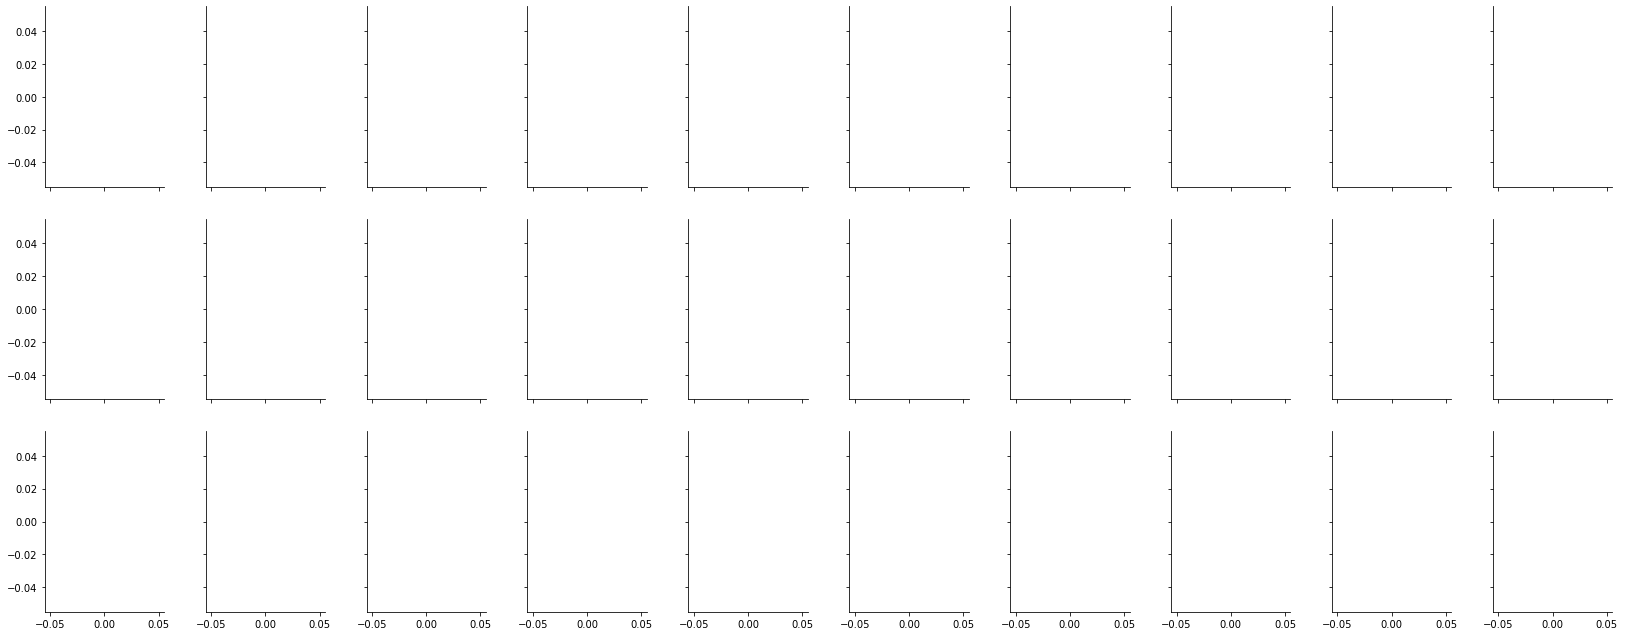

In [5]:
sns.relplot(x = "Station Id", y = "In", hue = "is_weekend",
            col = "date", col_wrap = 10,
            height = 3, aspect = .75, linewidth = 2.5,
            kind = "line", data = dataset);

### Data clearing

In [5]:
location = pd.read_csv("Cycle hire docking stations.csv")

In [6]:
# Finding invalid Station Id
station = []
station = location['Station.Id'].values.tolist()

def find_missing(list):
    return [i for x, y in zip(station, station[1:]) 
        for i in range(x + 1, y) if y - x > 1]

missing = find_missing(station)
missing

[35,
 137,
 179,
 198,
 205,
 241,
 285,
 304,
 342,
 346,
 369,
 385,
 391,
 406,
 407,
 413,
 414,
 415,
 416,
 417,
 418,
 422,
 429,
 434,
 438,
 493,
 555,
 567,
 575,
 582,
 585,
 791,
 822,
 823,
 824,
 825,
 835,
 836,
 837]

In [7]:
# delete values if Station Id is NOT inside the list 'missing'
dataset = dataset[~dataset['Station Id'].isin(missing)]

In [8]:
dataset.head()

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,17,22,1,-5.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,42,31,2,11.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.197574,51.4996,-0.197574,51.4996
2016-04-01,51,39,3,12.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.084606,51.5213,-0.084606,51.5213
2016-04-01,44,37,4,7.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.120974,51.5301,-0.120974,51.5301
2016-04-01,48,38,5,10.0,0.0,0.0,8.520833,7.895833,66.5,11.166667,1.0,-0.156876,51.4931,-0.156876,51.4931


In [186]:
#dataset.to_csv (r'C:Desktop\dataframe.csv', index = False, header=True)

### Datasets for each stations

In [9]:
# Extract number of bikes leaving to the station
## for loop with 800 station
## put that info to 800 datasets

obj = dataset.groupby('Station Id')

In [10]:
obj.get_group(1)

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,17,22,1,-5.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-01,19,22,1,-3.0,0.0,0.0,8.520833,7.895833,66.500000,11.166667,1.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-02,26,20,1,6.0,0.0,24.0,10.729167,9.458333,62.125000,14.833333,2.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-03,30,12,1,18.0,0.0,24.0,11.562500,11.041667,77.541667,11.312500,3.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-04,12,23,1,-11.0,0.0,0.0,11.083333,10.500000,77.520833,13.583333,4.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-05,23,17,1,6.0,0.0,0.0,11.583333,10.916667,65.708333,14.916667,5.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-06,10,23,1,-13.0,0.0,0.0,9.500000,7.208333,65.812500,26.437500,6.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-07,13,28,1,-15.0,0.0,0.0,7.604167,4.562500,71.895833,20.208333,7.0,-0.109971,51.5292,-0.109971,51.5292
2016-04-08,25,19,1,6.0,0.0,0.0,9.583333,8.437500,72.416667,11.187500,8.0,-0.109971,51.5292,-0.109971,51.5292


## Make sure to sort this error with strange STATION ID = 79, stop at 80
## clearning the data needed - either delete all the rows with invalid station

#### Having to find the missing value depending on the Station Id and to compare it for adding dataframe might not suitable. As there are different other factors (empty string, null value) that can contributed to missing value

In [12]:
# temp for machine learning

# add datasets to list
index = 1
df = []

# for now, until 30
for index in range(30):
    df.append(obj.get_group(index))
    
df

[            In  Out  Station Id  Total  is_holiday  is_weekend   avg_temp  \
 timestamp                                                                   
 2016-05-04   1    0           0    0.0         0.0         0.0  13.270833   
 2016-05-04   1    0           0    0.0         0.0         0.0  13.270833   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   3    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-05   1    0           0    0.0         0.0         0.0  14.125000   
 2016-05-06   1    0           0    0.0         0.0         0.0 

In [13]:
# add datasets to list
index = 1
df = []
dropped = [35,79,80]

# for now, until 30
for index in range(len(dataset['Station Id'])):
    if (index in dropped): # if station id is invalid, carry on to next station. 
        index = index + 1
    df.append(obj.get_group(index))
    
df

KeyError: 80

## Visualisation of the map

### think how you would do for different days

In [190]:
#Function to change colors

def color_change(c):
    if(c < 15):
        return('red')
    elif(15 <= c < 30):
        return('orange')
    else:
        return('green')

In [209]:
# Create base map

cap = dataset['In']
date = dataset.index
lat = dataset['latitude']
lon = dataset['longitude']

# make latitude and longitude into a list of tuples
loc = dataset[['latitude', 'longitude']].copy()
tuples = loc.to_records(index=False)
locations = list(tuples)

London = [51.506949, -0.122876]
map = folium.Map(location = London,
                 zoom_start = 12, 
                 tiles = "CartoDB positron")
marker_cluster = MarkerCluster(locations).add_to(map)

# Plot markers

for _lat, _lon, _cap, _date in zip(lat, lon, cap, date):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 9, 
                        popup = "("+ str(_cap) +")" + str(_date),
                        fill_color = color_change(_cap), 
                        color = "gray", 
                        fill_opacity = 0.9).add_to(marker_cluster)

In [ ]:
#map

### Graph of station 1

[Text(0.5, 0, 'timestamp'), Text(0, 0.5, 'In')]

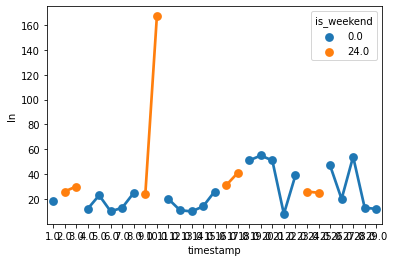

In [128]:
ax = sns.pointplot(x = 'date', y = "In", data = df[1], hue = "is_weekend");
ax.set(xlabel = 'timestamp', ylabel = 'In')

## Linear Regression

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [17]:
X = df[1].index.values.reshape(-1,1) # reshape to make it two-dimentional
y = df[1]['In'].values # Predict

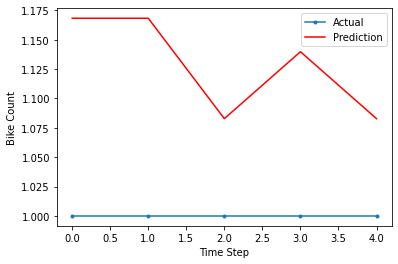

Mean Absolute Error: 0.1283582089552239
Mean Squared Error: 0.017969729494871772
Root Mean Squared Error: 0.1340512196694673


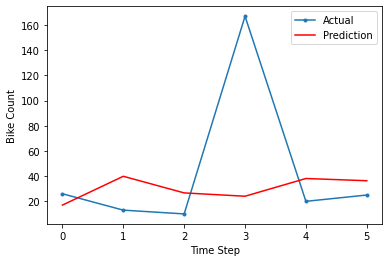

Mean Absolute Error: 37.50248896402742
Mean Squared Error: 3662.54924317217
Root Mean Squared Error: 60.518999026521996


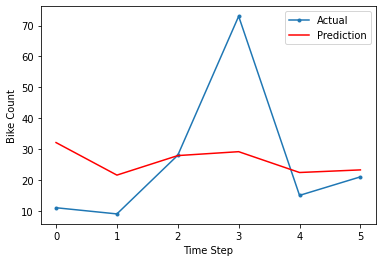

Mean Absolute Error: 14.54800055491971
Mean Squared Error: 430.9751898734168
Root Mean Squared Error: 20.759941952554126


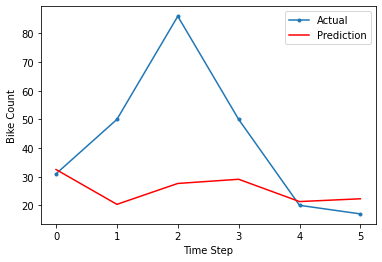

Mean Absolute Error: 19.504563863338866
Mean Squared Error: 792.5996433155136
Root Mean Squared Error: 28.15314624185925


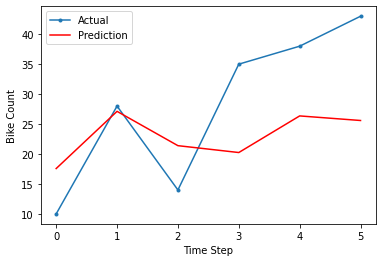

Mean Absolute Error: 9.939921069428339
Mean Squared Error: 128.1355760675764
Root Mean Squared Error: 11.319698585544423


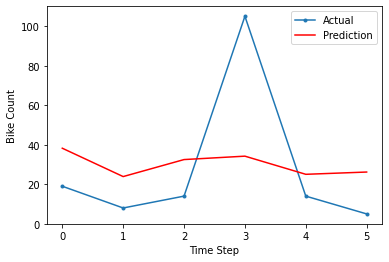

Mean Absolute Error: 26.104350510222613
Mean Squared Error: 1090.889380532304
Root Mean Squared Error: 33.02861457179674


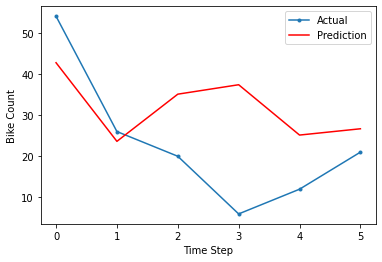

Mean Absolute Error: 13.155663289392457
Mean Squared Error: 258.2365011449916
Root Mean Squared Error: 16.06973867693534


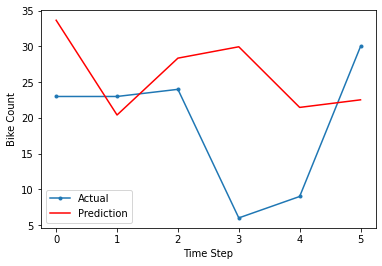

Mean Absolute Error: 10.254312379707303
Mean Squared Error: 154.1540663926929
Root Mean Squared Error: 12.415879606080791


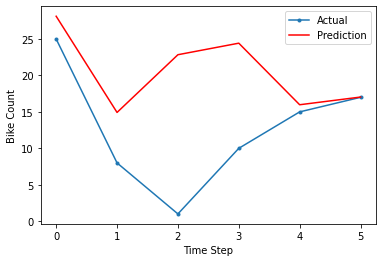

Mean Absolute Error: 7.889392565729831
Mean Squared Error: 123.99832835278484
Root Mean Squared Error: 11.135453666231333


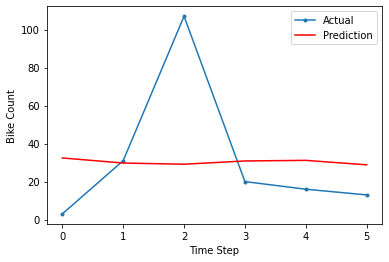

Mean Absolute Error: 25.067089864719776
Mean Squared Error: 1254.8927735665304
Root Mean Squared Error: 35.424465748498314


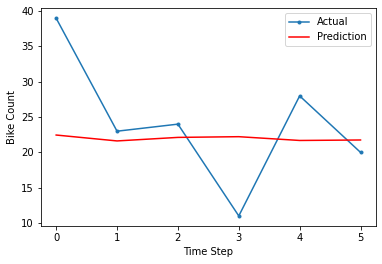

Mean Absolute Error: 6.514946855624447
Mean Squared Error: 74.66336239887022
Root Mean Squared Error: 8.640796398415496


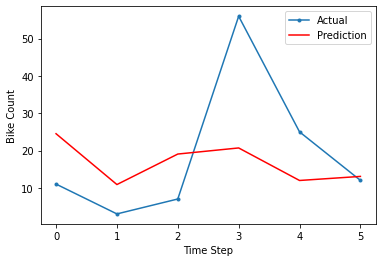

Mean Absolute Error: 13.805727782698556
Mean Squared Error: 301.26507627114876
Root Mean Squared Error: 17.35698926286321


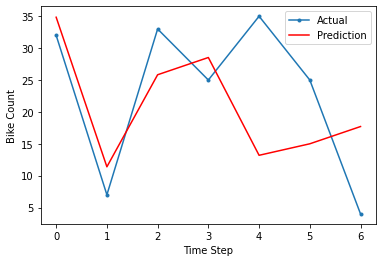

Mean Absolute Error: 9.064984178436365
Mean Squared Error: 122.10323883508295
Root Mean Squared Error: 11.050033431401145


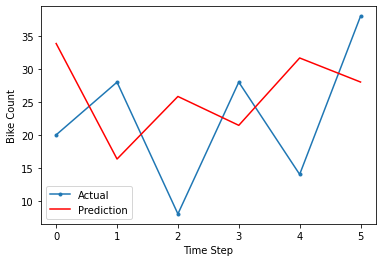

Mean Absolute Error: 12.92676767676768
Mean Squared Error: 183.4638118663444
Root Mean Squared Error: 13.544881389895757


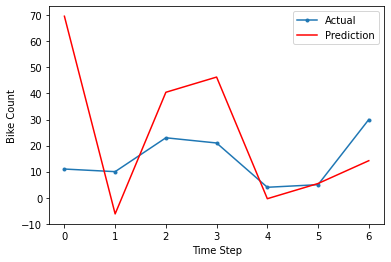

Mean Absolute Error: 19.756998423356382
Mean Squared Error: 702.6945880541497
Root Mean Squared Error: 26.50838712660862


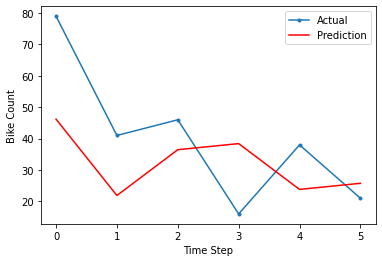

Mean Absolute Error: 17.138114465166954
Mean Squared Error: 376.5314392430874
Root Mean Squared Error: 19.404418034125307


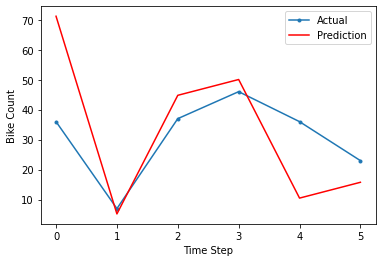

Mean Absolute Error: 13.577837595334223
Mean Squared Error: 336.2596744129595
Root Mean Squared Error: 18.33738461212393


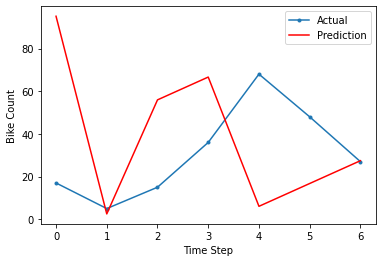

Mean Absolute Error: 35.120945300336146
Mean Squared Error: 1934.2614202526377
Root Mean Squared Error: 43.98023897448305


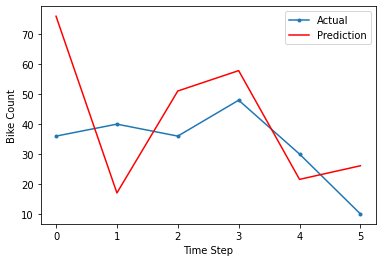

Mean Absolute Error: 18.75835912211431
Mean Squared Error: 464.730981231179
Root Mean Squared Error: 21.55762002706187


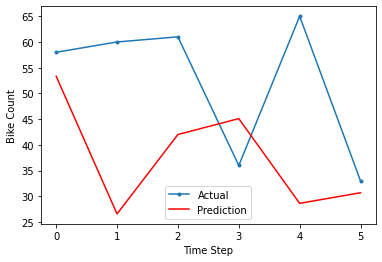

Mean Absolute Error: 17.4705372316443
Mean Squared Error: 484.765463647893
Root Mean Squared Error: 22.01739002806402


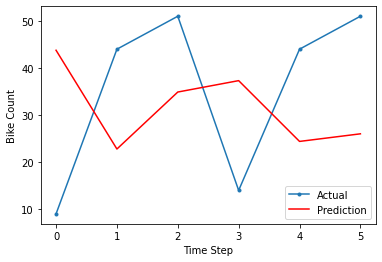

Mean Absolute Error: 23.330999281830305
Mean Squared Error: 578.4024904293775
Root Mean Squared Error: 24.04999980102656


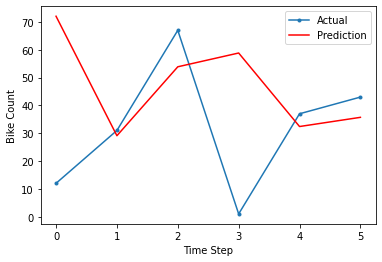

Mean Absolute Error: 24.12827646366353
Mean Squared Error: 1200.5252718055094
Root Mean Squared Error: 34.64859696734501


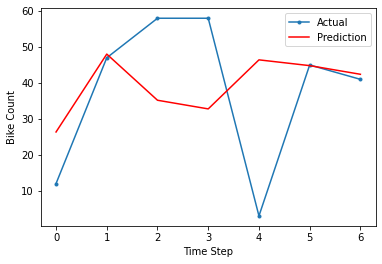

Mean Absolute Error: 15.490630790653816
Mean Squared Error: 464.47940176773596
Root Mean Squared Error: 21.551784189893326


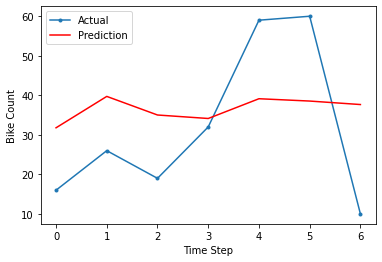

Mean Absolute Error: 16.664033726261806
Mean Squared Error: 331.2694672200194
Root Mean Squared Error: 18.200809521008107


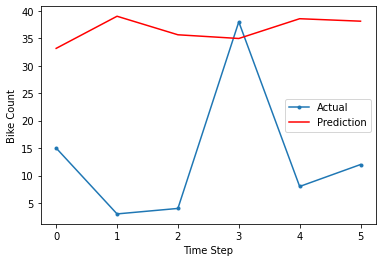

Mean Absolute Error: 24.260651881720435
Mean Squared Error: 709.2597025362851
Root Mean Squared Error: 26.63193013163494


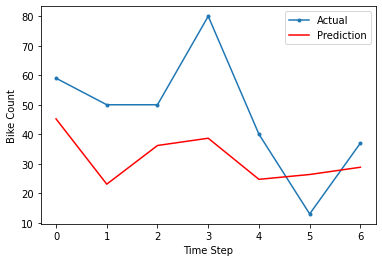

Mean Absolute Error: 18.954474548440068
Mean Squared Error: 470.54116951427824
Root Mean Squared Error: 21.69196094211582


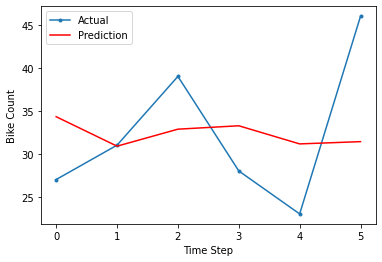

Mean Absolute Error: 6.92668010752688
Mean Squared Error: 66.33530197222943
Root Mean Squared Error: 8.14464867088995


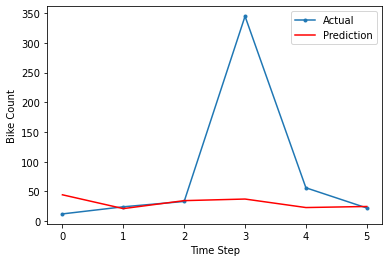

Mean Absolute Error: 63.39776545698925
Mean Squared Error: 16165.202175921317
Root Mean Squared Error: 127.14244836372043


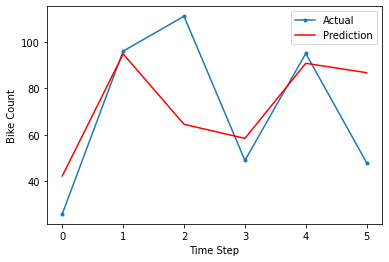

Mean Absolute Error: 19.40885416666666
Mean Squared Error: 672.5084924820271
Root Mean Squared Error: 25.932768700661853


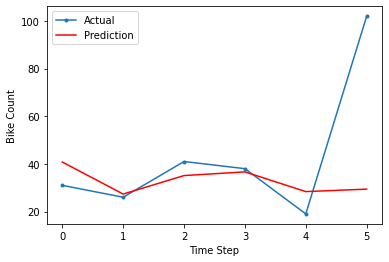

Mean Absolute Error: 16.72399193548387
Mean Squared Error: 915.3067493577654
Root Mean Squared Error: 30.254036910101195


In [140]:
# split into input (train) and output (test) variables for each of the datasets
y_pred = []
linear_df = []
station_df = []

for i in range(30): # meant to be len(dataset['Station Id'])
    X = df[i]['date'].values.reshape(-1,1) # reshape to make it two-dimentional
    y = df[i]['In'].values # Predict
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    #print('Training Features Shape:', X_train.shape, 'station:', i)
    #print('Training Labels Shape:', y_train.shape,'station:', i)
    #print('Testing Features Shape:', X_test.shape,'station:', i)
    #print('Testing Labels Shape:', y_test.shape,'station:', i)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #To retrieve the intercept:
    #print(model.intercept_ ,'station:', i)
    #For retrieving the slope:
    #print(model.coef_ ,'station:', i)
    
    y_pred = model.predict(X_test)
    
    #print(y_pred,"pred")
    #print(y_test,"actual")
    linear_df = pd.DataFrame(y_test, y_pred) # list to dataframe (for one station only)
    
    station_df.append(linear_df) # append to the datasets that contains all the data for each station
   
    #index = ["Station 1", "Station 2", "Station 3", "Station 4", "Station 5", "Station 6", "Station 7"]

    ## Print heading
    #print('Station Id:',i)
    
    
    ## Plotting in a graph form
    plt.plot(y_test, marker='.', label="Actual")
    plt.plot(y_pred, color='red', label="Prediction")
    plt.ylabel('Bike Count')
    plt.xlabel('Time Step')
    plt.legend()
    plt.show();
    
    ## Calculate error
    from sklearn import metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [123]:
# lists of predicted and actual data for each of the stations
station_df

[          0
 1.168250  1
 1.168250  1
 1.082768  1
 1.139756  1
 1.082768  1,
              0
 17.008735   26
 39.887856   13
 26.688363   10
 24.048464  167
 38.127923   20
 36.367991   25,
             0
 32.100198  11
 21.565394   9
 27.886276  28
 29.150453  73
 22.408178  15
 23.250962  21,
             0
 32.495796  31
 20.338086  50
 27.632712  86
 29.091637  50
 21.310703  20
 22.283320  17,
             0
 17.573505  10
 27.124059  28
 21.393727  14
 20.247660  35
 26.360015  38
 25.595971  43,
              0
 38.234121   19
 23.890239    8
 32.496568   14
 34.217834  105
 25.037749   14
 26.185260    5,
             0
 42.715546  54
 23.620329  26
 35.077459  20
 37.368885   6
 25.147946  12
 26.675564  21,
             0
 33.671424  23
 20.408814  23
 28.366380  24
 29.957893   6
 21.469822   9
 22.530831  30,
             0
 28.123795  25
 14.924256   8
 22.843979   1
 24.427924  10
 15.980219  15
 17.036182  17,
              0
 32.436842    3
 29.767017   31
 29.138823 

In [ ]:
#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/
#https://realpython.com/linear-regression-in-python/

## Neural network

In [29]:
# create a model
# and call data in loop for training

import keras

#model = keras.Sequential()
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dropout(0.2))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

model = keras.Sequential([
    layers.Dense(4, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
train_size = int(len(df[0]) * 0.8)
test_size = len(df[0]) - train_size
train, test = df[0].iloc[0:train_size], df[0].iloc[train_size:len(df[0])]
print(len(train),len(test))

18 5


In [35]:
model.fit(tf.stack(train), tf.stack(test), epochs = 10)

ValueError: Data cardinality is ambiguous:
  x sizes: 24
  y sizes: 6
Make sure all arrays contain the same number of samples.

In [141]:
# split into input (train) and output (test) variables for each of the datasets
i = 1
for i in range(30): # meant to be len(dataset['Station Id'])
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size
    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]
    print(len(train),len(test))
    print(train.index[i] ,"train",test.index[i])
    # fit the model
    #model.fit(np.array(train), np.array(test), epochs=10)
    #model.fit(train.index[0], test.index[0], epochs=10)

18 5
2016-05-04 00:00:00 train 2016-05-08 00:00:00
24 6
2016-04-01 00:00:00 train 2016-04-25 00:00:00
24 6
2016-04-03 00:00:00 train 2016-04-26 00:00:00
24 6
2016-04-04 00:00:00 train 2016-04-27 00:00:00
24 6
2016-04-05 00:00:00 train 2016-04-28 00:00:00
24 6
2016-04-06 00:00:00 train 2016-04-29 00:00:00
24 6


IndexError: index 6 is out of bounds for axis 0 with size 6

In [129]:
model.fit(train.index[0], test.index[0], epochs=10)

ValueError: Failed to find data adapter that can handle input: <class 'pandas._libs.tslibs.timestamps.Timestamp'>, <class 'pandas._libs.tslibs.timestamps.Timestamp'>

## LSTM (Long short-term memory neural networks)

In [124]:
# split into input (train) and output (test) variables for each of the datasets
i = 1
for i in range(30): # meant to be len(dataset['Station Id'])
    train_size = int(len(df[i]) * 0.8)
    test_size = len(df[i]) - train_size
    train, test = df[i].iloc[0:train_size], df[i].iloc[train_size:len(df[i])]
    #print(len(train),len(test))
    

print(train.index[0])

2016-04-01 00:00:00


#### caling continuous data optimizes machine learning model performance. I scaled temperature, humidity and windspeed to have mean 0 and standard deviation 1. This process optimizes machine learning model's performance and model converges quicker.

In [111]:
from sklearn.preprocessing import StandardScaler
feature_transformer = StandardScaler()
feature_columns = ['avg_temp', 'avg_temp_feel', 'avg_humidity', 'avg_windSpeed']
feature_transformer = feature_transformer.fit(train[feature_columns].to_numpy())
train.loc[:, feature_columns] = feature_transformer.transform(train[feature_columns].to_numpy())
test.loc[:, feature_columns] = feature_transformer.transform(test[feature_columns].to_numpy())

Total_transformer = StandardScaler()
Total_transformer = Total_transformer.fit(train[['In']])
train['In'] = Total_transformer.transform(train[['In']])
test['In'] = Total_transformer.transform(test[['In']])

/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/hchae/opt/anaconda3/envs/py3/lib/python3.10/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/var/folders/2c/q0jzg_j92xjbxq26p0b0hmbh0000gn/T/ipykernel_5684/4077722669.py:10: SettingWithCopyWarning: 
A val

In [126]:
train

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-01,30,27,29,3.0,0.0,0.0,-0.764265,-0.270693,-0.314159,-0.808826,1.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-02,49,33,29,16.0,0.0,24.0,0.481276,0.359639,-0.959638,0.012049,2.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-03,31,29,29,2.0,0.0,24.0,0.951291,0.998376,1.314908,-0.776178,3.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-04,71,26,29,45.0,0.0,0.0,0.681033,0.779861,1.311835,-0.267795,4.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-05,24,34,29,-10.0,0.0,0.0,0.963042,0.947949,-0.430960,0.030705,5.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-06,20,40,29,-20.0,0.0,0.0,-0.211997,-0.548039,-0.415591,2.609932,6.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-07,44,22,29,22.0,0.0,0.0,-1.281281,-1.615401,0.481932,1.215377,7.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-08,64,37,29,27.0,0.0,0.0,-0.164995,-0.052177,0.558775,-0.804162,8.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-09,9,36,29,-27.0,0.0,24.0,-0.505756,-0.632083,0.303657,0.235924,9.0,-0.193487,51.5137,-0.193487,51.5137


In [127]:
test

,In,Out,Station Id,Total,is_holiday,is_weekend,avg_temp,avg_temp_feel,avg_humidity,avg_windSpeed,date,start_lon,start_lat,longitude,latitude
timestamp,,,,,,,,,,,,,,,
2016-04-25,102,31,29,71.0,0.0,0.0,-1.034523,-1.144753,0.823114,0.781619,25.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-26,38,29,29,9.0,0.0,0.0,-2.021556,-2.397012,-1.033407,1.378619,26.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-27,19,27,29,-8.0,0.0,0.0,-1.868801,-1.817107,-0.790584,-0.230482,27.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-28,60,25,29,35.0,0.0,0.0,-1.093275,-0.968260,-0.655341,0.487783,28.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-29,26,14,29,12.0,0.0,0.0,-0.729013,-1.153157,-1.208609,2.115541,29.0,-0.193487,51.5137,-0.193487,51.5137
2016-04-30,6,38,29,-32.0,0.0,24.0,-0.447004,-0.245479,-1.866383,-0.561631,30.0,-0.193487,51.5137,-0.193487,51.5137


In [114]:
## Create X_train, y_train, X_test and y_test

""" 
Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence, Xs: Numpy array of sequences of time-series data
        * output, ys: Numpy array of output i.e. next value for respective sequence
    
"""

def createDataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        #if (dataset['Station Id'][i] == 1):
        data = X.iloc[i:(i + time_steps)].values
        Xs.append(data)        
        ys.append(y.iloc[i + time_steps])
        
    return np.array(Xs), np.array(ys)

time_steps = 7
X_train, y_train = createDataset(train, train.Total, time_steps)
X_test, y_test = createDataset(test, test.Total, time_steps)
print(X_train.shape, y_train.shape)

(17, 7, 15) (17,)


##### Here I define LSTM model as our machine learning model for predicting bike share demand. Because LSTMS have the ability to capture the sequence in a data, hence I used LSTM. Dropout rate of 20% is used to prevent overfitting. Output is one unit as we are predicting one value of "cnt" on basis of input parameters. Since data is continuous, mean square error loss is used.

In [115]:
# Predicting Demand 

import keras

model = keras.Sequential()
model.add(
  layers.Bidirectional(
    layers.LSTM(
      units = 128, 
      input_shape = (X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(units = 1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model

### do something to decrease the loss / error
### plot a graph ( daily graph as above ) with actual and predicted values

In [116]:
# Train the model

history = model.fit(
    X_train, y_train, 
    epochs=5, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/5
1/1 [==============================] - 4s 4s/step - loss: 265.6334 - val_loss: 88.3085
Epoch 2/5
1/1 [==============================] - 0s 30ms/step - loss: 265.6075 - val_loss: 91.0658
Epoch 3/5
1/1 [==============================] - 0s 31ms/step - loss: 265.9698 - val_loss: 93.5304
Epoch 4/5
1/1 [==============================] - 0s 31ms/step - loss: 264.9753 - val_loss: 95.7409
Epoch 5/5
1/1 [==============================] - 0s 33ms/step - loss: 262.3413 - val_loss: 98.0315


In [117]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              147456    
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 257       
                                                                 
Total params: 147,713
Trainable params: 147,713
Non-trainable params: 0
_________________________________________________________________


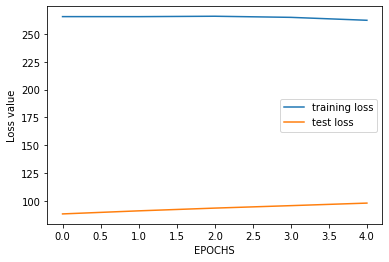

In [118]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [119]:
y_pred = model.predict(X_test)
y_pred

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [19]:
# Inverse transformed data
# To get original unscaled values

y_train_inv = Total_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = Total_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = Total_transformer.inverse_transform(y_pred.reshape(1, -1))

y_train_inv = y_train_inv.flatten()
y_test_inv = y_test_inv.flatten()
y_pred_inv = y_pred_inv.flatten()

print(y_train_inv)
print(y_test_inv)
print(y_pred_inv)

[  100.8851475    267.90938362   167.69484195 ...  -132.94878307
 -1769.78629708   301.31423084]
[ 1403.67418925 -1736.38144985  -366.78271365 ...    34.07545305
    34.07545305    34.07545305]
[41.83983 41.83983 41.83983 ... 41.83983 41.83983 41.83983]


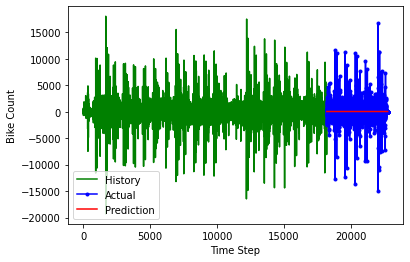

In [20]:
#Plot history, actual and predicted value

plt.plot(np.arange(0, len(y_train)), y_train_inv, color='green', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, color='blue', marker='.', label="Actual")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, color='red', label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

KeyboardInterrupt: 

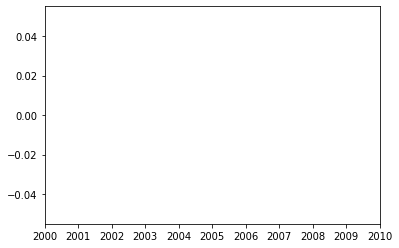

In [38]:
# before modelling 

ax = sns.lineplot(x = "timestamp", y = "In", data = dataset)
ax.set(xlabel = 'timestamp', ylabel = 'Count')

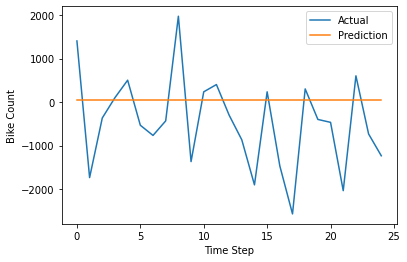

In [21]:
# Plot actual and predicted value

plt.plot(y_test_inv[:25,], label="Actual")
plt.plot(y_pred_inv[:25,], label="Prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();